# Home Assignment 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier



# import warnings
# warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # enable showing all columns of the df

## 1. Data pre-processing

### 1.1 Prepare the data

In [31]:
df = pd.read_csv("Postures.csv")
print(f'DF shape: {df.shape}')
df.head()

DF shape: (78096, 38)


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


Eliminate the first row, as it has only zeroes

In [32]:
df.drop(index=0, inplace=True)

In [33]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [34]:
# Check what values the User column has

df['User'].unique()


array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [27]:
df['Class'].value_counts().to_frame().T # dataset is balanced

,3,1,5,2,4
Class,16344,16265,15733,14978,14775


Split the data into training, testing, and validation (ivs) sets

In [28]:
X, y = df.drop(columns='Class'), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### 1.2 Data Transformation and Encoding

In [40]:
# Number of instances per user
df['User'].value_counts().sort_index().to_frame().T

,0,1,2,4,5,6,7,8,9,10,11,12,13,14
User,9048,4717,4513,379,5105,4377,492,6811,3920,9573,8061,4865,8739,7495


In [37]:
# Type of data in column User
df['User'].dtype

dtype('int64')

In [38]:
# Convert the User column to a categorical column (in X_train and X_test)
X_train['User'] = X_train['User'].astype('category')
X_test['User'] = X_test['User'].astype('category')

# One-hot encode the User column (in X_train and X_test)
X_train_encoded = pd.get_dummies(X_train, columns=['User'], prefix='User')
X_test_encoded = pd.get_dummies(X_test, columns=['User'], prefix='User')

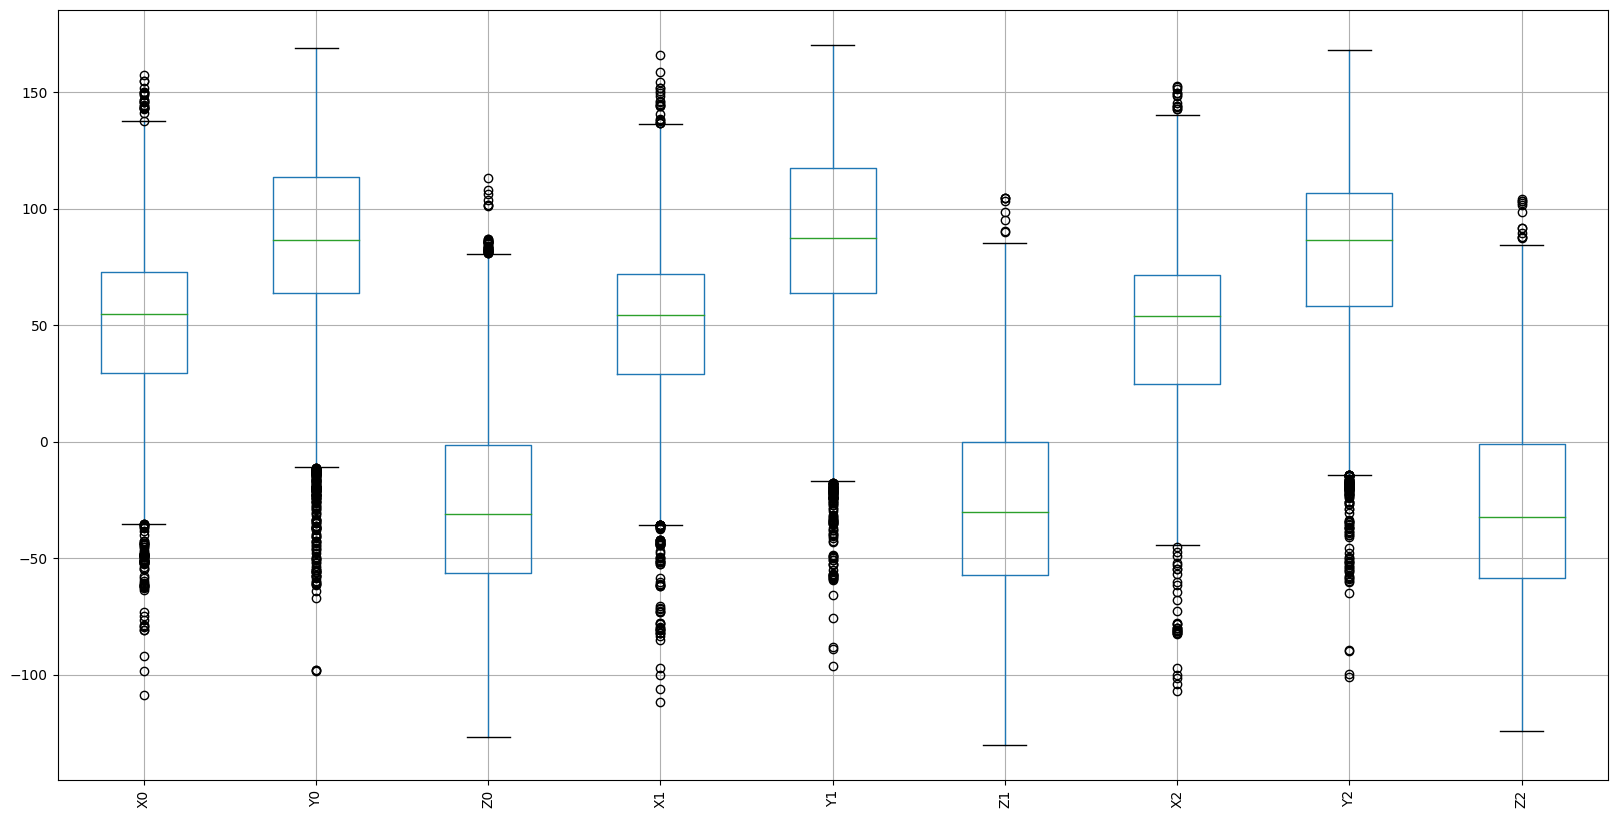

In [47]:
# Finding outliers - Boxplot of the columns except the last 14 (the User columns)
X_train_encoded.iloc[:, :-14].boxplot(figsize=(20, 10))
plt.xticks(rotation=90)
plt.show()

### 1.3 Data Scaling

In [11]:
#TODO: Scale the training set and apply the same scaler to the remaining datasets (test, ivs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_ivs_scaled = scaler.transform(X_ivs)

### 1.4 Handle missing values

Mark missing data as NaN, so it is easier to handle than '?'

In [20]:
X_train, X_test, X_ivs = X_train.replace("?", pd.NA), X_test.replace("?", pd.NA), X_ivs.replace("?", pd.NA)
print('Number of missing values in each column in the training set')
X_train.isna().sum().to_frame().T

Number of missing values in each column in the training set


,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0,0,0,0,0,0,0,0,390,390,390,1774,1774,1774,7285,7285,7285,14441,14441,14441,21960,21960,21960,26717,26717,26717,30372,30372,30372,35543,35543,35543,43909,43909,43909


In [21]:
#TODO
### JUST TESTING - IGNORE THIS

# Remove the columns with more than 10% missing values from the training set

# find columns with more than 10% missing values
train_cols_to_drop = X_train.columns[X_train.isna().sum() > 0.1 * X_train.shape[0]]
test_cols_to_drop = X_test.columns[X_test.isna().sum() > 0.1 * X_test.shape[0]]
ivs_cols_to_drop = X_ivs.columns[X_ivs.isna().sum() > 0.1 * X_ivs.shape[0]]
print(f'Number of columns dropped from the training set: {len(train_cols_to_drop)}')
print(f'Number of columns dropped from the test set: {len(test_cols_to_drop)}')
print(f'Number of columns dropped from the ivs set: {len(ivs_cols_to_drop)}')
# drop columns from the training set
X_train.drop(columns=train_cols_to_drop, inplace=True)
X_test.drop(columns=test_cols_to_drop, inplace=True)
X_ivs.drop(columns=ivs_cols_to_drop, inplace=True)


Number of columns to drop from the training set: 21
Number of columns to drop from the test set: 21
Number of columns to drop from the ivs set: 21


In [22]:
# Remove NA values from the training set
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
X_ivs.dropna(inplace=True)


Table with all the data sets (train, test, validation) with different modifications

In [ ]:
# Dictionaries of datasets and models - TEMPLATE [NO REAL DATA] - To be used in the model loops
X_trains = {"Mod1": X_train_Mod1, "Mod2": X_train_Mod2, "Mod3": X_train_Mod3}
y_trains = {"Mod1": y_train_Mod1, "Mod2": y_train_Mod2, "Mod3": y_train_Mod3}
X_tests = {"Mod1": X_test_Mod1, "Mod2": X_test_Mod2, "Mod3": X_test_Mod3}


## 2. Classification

In [ ]:
# Empty dataFrame that will have all the results - to be printed at the end
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

### 2.1 Linear models


In [ ]:
# Linear regression
for version in X_trains.keys(): # for each version of the dataset
    lr = LogisticRegression(random_state=42, max_iter=1000) # create the model
    lr.fit(X_trains[version], y_trains[version]) # train the model
    y_pred = lr.predict(X_tests[version]) # predict the test set
    accuracy = accuracy_score(y_test, y_pred) # calculate the accuracy
    results_df = results_df.append({'Model': f'Logistic Regression_{version}', 'Accuracy': accuracy}, ignore_index=True) # add the results to the results df

### 2.2 Tree Based models

In [ ]:
# Tree classifier
for version in X_trains.keys(): # loop over the different versions of the datasets
    tree = DecisionTreeClassifier(random_state=42) # initialize the model
    tree.fit(X_trains[version], y_trains[version]) # fit the model
    y_pred = tree.predict(X_tests[version]) # predict
    accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
    results_df = results_df.append({'Model': f'Decision Tree_{version}', 'Accuracy': accuracy}, ignore_index=True) # add the results to the results_df


### 2.3 Naive Bayes

In [ ]:
# Naive Bayes
for version in X_trains.keys(): # loop over the different versions of the datasets
    gnb = GaussianNB() # initialize the model
    gnb.fit(X_trains[version], y_trains[version]) # fit the model
    y_pred = gnb.predict(X_tests[version]) # predict
    accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
    results_df = results_df.append({'Model': f'Naive Bayes_{version}', 'Accuracy': accuracy}, ignore_index=True) # add the results to the results_df

### 2.4 K-Nearest Neighbours

In [ ]:
# KNN
for version in X_trains.keys(): # loop over the different versions of the datasets
    knn = KNeighborsClassifier()# Initialize the model
    knn.fit(X_trains[version], y_trains[version]) # Fit the model
    y_pred = knn.predict(X_tests[version]) # Make predictions
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    results_df = results_df.append({'Model': f'KNN_{version}', 'Accuracy': accuracy}, ignore_index=True) # Append the result to the DataFrame


## 3. Results

In [ ]:
print(results_df)